In [ ]:
###########################################

# Yaseen Mohammed, yam200000

###########################################


import numpy as np
import pandas as pd
import os
import cv2
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from matplotlib.image import imread
import pathlib
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LeakyReLU

In [ ]:
# Loading my kaggle profile and downloading the zip file of the images

os.environ["KAGGLE_USERNAME"] = "umar2354"

os.environ["KAGGLE_KEY"] = "c9114a316a26a66568f37bc28aca46fc"

# Download images of Brain Tumors

!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 99% 86.0M/86.8M [00:05<00:00, 28.0MB/s]
100% 86.8M/86.8M [00:05<00:00, 16.3MB/s]


In [ ]:
# Unzip Files

from zipfile import ZipFile
file_name = "/content/brain-tumor-classification-mri.zip"
with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("done")

done


In [ ]:
# Checking for file paths, making sure everything loads properly

# Train

warnings.filterwarnings("ignore")
data_dir_list = os.listdir("/content/Training")
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Training"))
file_count = len(files)

# Test

warnings.filterwarnings("ignore")
data_dir_list = os.listdir("/content/Testing")
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Testing"))
file_count = len(files)

['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']
['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/10
90/90 [==============================] - 95s 1s/step - loss: 1.3031 - accuracy: 0.3756 - val_loss: 1.5821 - val_accuracy: 0.2234
Epoch 2/10
90/90 [==============================] - 92s 1s/step - loss: 1.1945 - accuracy: 0.4460 - val_loss: 2.3125 - val_accuracy: 0.2640
Epoch 3/10
90/90 [==============================] - 91s 1s/step - loss: 1.0670 - accuracy: 0.5429 - val_loss: 1.8129 - val_accuracy: 0.3426
Epoch 4/10
90/90 [==============================] - 92s 1s/step - loss: 0.9981 - accuracy: 0.5774 - val_loss: 3.3532 - val_accuracy: 0.2741
Epoch 5/10
90/90 [==============================] - 92s 1s/step - loss: 0.9406 - accuracy: 0.5916 - val_loss: 2.5932 - val_accuracy: 0.3401
Epoch 6/10
90/90 [==============================] - 89s 982ms/step - loss: 0.8955 - accuracy: 0.6115 - val_loss: 2.8910 - val_accuracy: 0.3249
Epoch 7/10
90/90 [==============================] - 91s 1s/step - loss: 0.

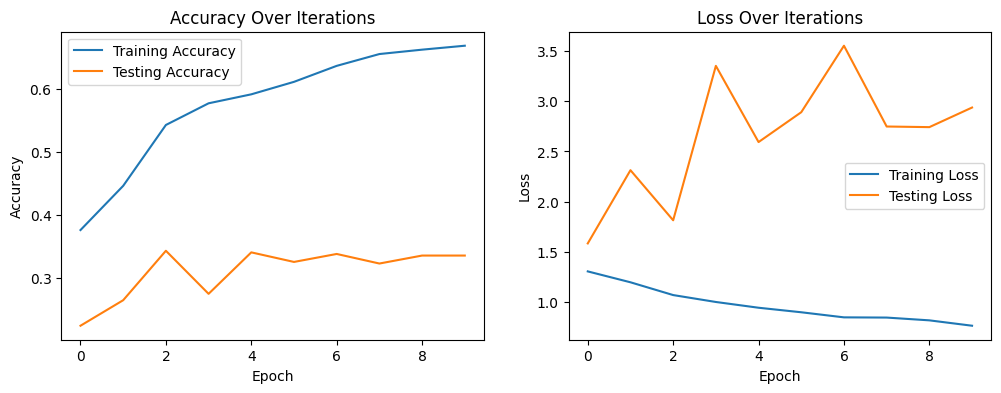

In [ ]:
# Iteration 1

# Set data directory paths
train_dir = "/content/Training"
test_dir = "/content/Testing"

# Define image dimensions and batch size
image_width = 128
image_height = 128
batch_size = 32

# Create data generators with data augmentation for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical')

# Create a sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs
epochs = 10

# Train the model and collect training history
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1)

# Plot the training and testing accuracy and loss over iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Iterations')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Iterations')

plt.show()


In [ ]:
# Save model

model.save('history.h5')

Epoch 1/5
90/90 [==============================] - 115s 1s/step - loss: 1.2579 - accuracy: 0.4021 - val_loss: 2.7575 - val_accuracy: 0.2716
Epoch 2/5
90/90 [==============================] - 112s 1s/step - loss: 1.1281 - accuracy: 0.5042 - val_loss: 3.1684 - val_accuracy: 0.3274
Epoch 3/5
90/90 [==============================] - 103s 1s/step - loss: 0.9660 - accuracy: 0.5822 - val_loss: 3.5953 - val_accuracy: 0.3629
Epoch 4/5
90/90 [==============================] - 103s 1s/step - loss: 0.9122 - accuracy: 0.6017 - val_loss: 4.6272 - val_accuracy: 0.3325
Epoch 5/5
90/90 [==============================] - 102s 1s/step - loss: 0.8420 - accuracy: 0.6341 - val_loss: 5.1039 - val_accuracy: 0.3325


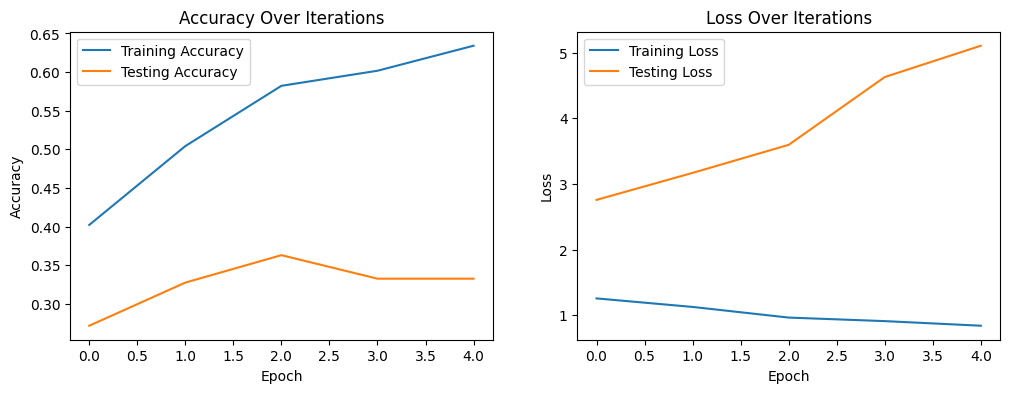

In [ ]:
# Iteration 2

# Create a sequential model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.1), input_shape=(image_width, image_height, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.1)))
model1.add(MaxPooling2D(2, 2))
model1.add(Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.1)))
model1.add(MaxPooling2D(2, 2))
model1.add(Flatten())
model1.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs
epochs = 5

# Train the model and collect training history
history1 = model1.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1)

# Plot the training and testing accuracy and loss over iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Iterations')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Iterations')

plt.show()

Epoch 1/5
90/90 [==============================] - 46s 505ms/step - loss: 1.3970 - accuracy: 0.3439 - val_loss: 1.4477 - val_accuracy: 0.2284
Epoch 2/5
90/90 [==============================] - 47s 521ms/step - loss: 1.3039 - accuracy: 0.3864 - val_loss: 1.5454 - val_accuracy: 0.2183
Epoch 3/5
90/90 [==============================] - 45s 502ms/step - loss: 1.2795 - accuracy: 0.4049 - val_loss: 1.7104 - val_accuracy: 0.1929
Epoch 4/5
90/90 [==============================] - 47s 519ms/step - loss: 1.2625 - accuracy: 0.4049 - val_loss: 1.7263 - val_accuracy: 0.1827
Epoch 5/5
90/90 [==============================] - 45s 499ms/step - loss: 1.2422 - accuracy: 0.3993 - val_loss: 1.9194 - val_accuracy: 0.1548


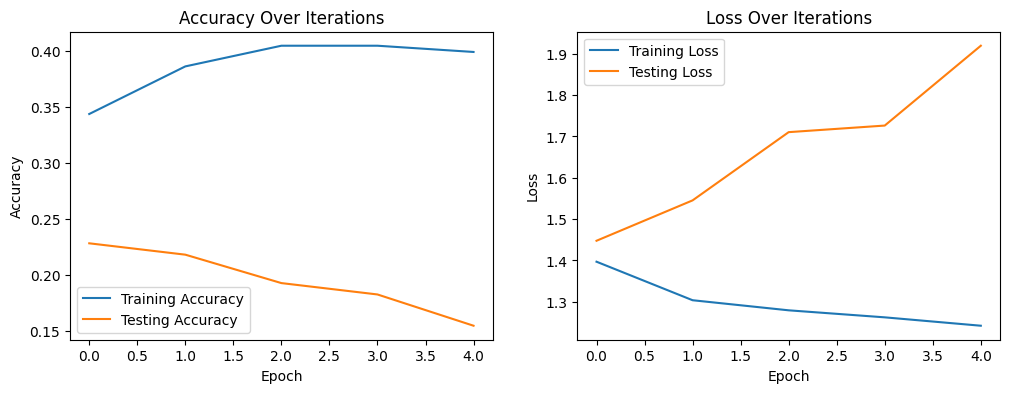

In [ ]:
# Iteration 3

# Create a sequential model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs
epochs = 5

# Train the model and collect training history
history2 = model2.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1)

# Plot the training and testing accuracy and loss over iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Iterations')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Iterations')

plt.show()

Epoch 1/5
90/90 [==============================] - 61s 671ms/step - loss: 1.5107 - accuracy: 0.3373 - val_loss: 1.5335 - val_accuracy: 0.2437
Epoch 2/5
90/90 [==============================] - 61s 671ms/step - loss: 1.2248 - accuracy: 0.4321 - val_loss: 1.6250 - val_accuracy: 0.2792
Epoch 3/5
90/90 [==============================] - 60s 663ms/step - loss: 1.1989 - accuracy: 0.4509 - val_loss: 1.7042 - val_accuracy: 0.2970
Epoch 4/5
90/90 [==============================] - 59s 655ms/step - loss: 1.1852 - accuracy: 0.4613 - val_loss: 1.7959 - val_accuracy: 0.2005
Epoch 5/5
90/90 [==============================] - 62s 682ms/step - loss: 1.1609 - accuracy: 0.4882 - val_loss: 1.8851 - val_accuracy: 0.2690


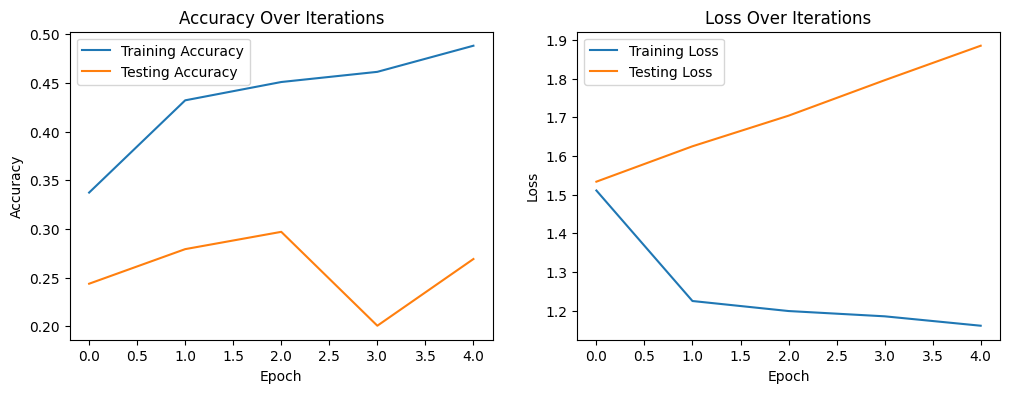

In [ ]:
# Iteration 4

# Create a sequential model
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), activation=LeakyReLU(alpha=0.1), input_shape=(image_width, image_height, 3)))
model3.add(MaxPooling2D(2, 2))
model3.add(Flatten())
model3.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model3.add(Dropout(0.5))
model3.add(Dense(4, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs
epochs = 5

# Train the model and collect training history
history3 = model3.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1)

# Plot the training and testing accuracy and loss over iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Iterations')

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Iterations')

plt.show()

Found 394 images belonging to 4 classes.
13/13 [==============================] - 4s 281ms/step


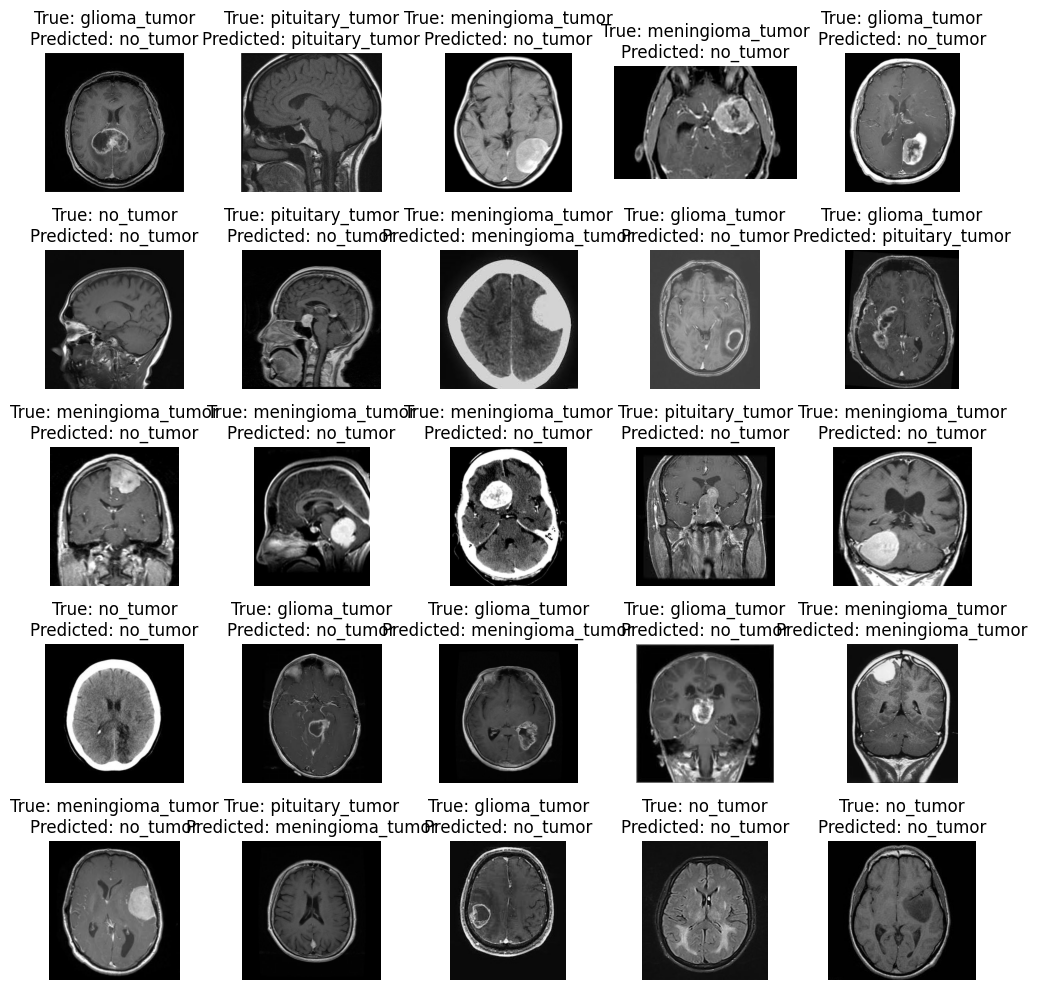

In [ ]:
# Example of at least 25 test data points from test dataset

import numpy as np
import matplotlib.pyplot as plt

# Set the number of test data points to display
num_samples = 25

# Load the trained model (make sure your model is already trained)
# Replace 'your_model_path' with the actual path to your trained model
model = keras.models.load_model('history.h5')

# Create a data generator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Get predictions for the test data
predictions = model.predict(test_generator)

# Get the true labels
true_labels = test_generator.labels

# Get class labels from the data generator
class_labels = list(test_generator.class_indices.keys())

# Select a random set of indices for displaying the data
random_indices = np.random.choice(len(true_labels), num_samples, replace=False)

# Create a subplot for displaying the data and predictions
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(5, 5, i)
    plt.imshow(imread(test_generator.filepaths[idx]))
    true_label = class_labels[true_labels[idx]]
    predicted_label = class_labels[np.argmax(predictions[idx])]
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

# Create a list of dictionaries to store parameter tuning results
parameter_results = [
    {'Iteration': 1, 'Number of Layers': 10, 'Filter Size Layer 1': '(3, 3)', 'Activation Function': 'ReLU', 'Train Accuracy': 0.6690, 'Test Accuracy': 0.3350},
    {'Iteration': 2, 'Number of Layers': 10, 'Filter Size Layer 1': '(3, 3)', 'Activation Function': 'LeakyReLU', 'Train Accuracy': 0.6341, 'Test Accuracy': 0.3325},
    {'Iteration': 3, 'Number of Layers': 6, 'Filter Size Layer 1': '(3, 3)', 'Activation Function': 'ReLU', 'Train Accuracy': 0.4049, 'Test Accuracy': 0.1827},
    {'Iteration': 4, 'Number of Layers': 6, 'Filter Size Layer 1': '(5, 5)', 'Activation Function': 'LeakyReLU', 'Train Accuracy': 0.4882, 'Test Accuracy': 0.2690},
]

# Create a DataFrame from the list of dictionaries
parameter_df = pd.DataFrame(parameter_results)

# Display the parameter tuning table
print(parameter_df)


   Iteration  Number of Layers Filter Size Layer 1 Activation Function  \
0          1                10              (3, 3)                ReLU   
1          2                10              (3, 3)           LeakyReLU   
2          3                 6              (3, 3)                ReLU   
3          4                 6              (5, 5)           LeakyReLU   

   Train Accuracy  Test Accuracy  
0          0.6690         0.3350  
1          0.6341         0.3325  
2          0.4049         0.1827  
3          0.4882         0.2690  
